In [498]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Initial investigation

## Import modules, read data


In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('traffic.zip', parse_dates={'timestamp':[0,1]}) #look up time zones (UTC)

## View data and data types

In [469]:
pd.options.display.max_columns = 999
df.head(10)

,timestamp,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29 15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29 03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29 19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29 00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29 19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29 09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [470]:
df.dtypes

timestamp                        datetime64[ns]
BOROUGH                                  object
ZIP CODE                                float64
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                 int64
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJURED             int64
NUMBER OF PEDESTRIANS KILLED              int64
NUMBER OF CYCLIST INJURED                 int64
NUMBER OF CYCLIST KILLED                  int64
NUMBER OF MOTORIST INJURED                int64
NUMBER OF MOTORIST KILLED                 int64
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3            object
CONTRIBUTING FACTOR VEHICLE 4           

## Clean data

### remove all-caps in column names and some fields

In [471]:
df.columns = map(str.lower, df.columns)

for col in ['borough', 'on street name', 'cross street name', 'off street name']:
    df[col] = df[col].str.lower()

### remove spaces

In [472]:
df.columns = df.columns.str.replace(' ', '_')

df.head()

,timestamp,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2020-08-29 15:40:00,bronx,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),pratt avenue,strang avenue,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,brooklyn,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),bushwick avenue,palmetto street,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 avenue,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,bronx,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 simpson street,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,brooklyn,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 snyder avenue,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


### change zip and collision id to categorical data

In [473]:
df.zip_code = df.zip_code.dropna().apply(lambda x: str(int(x)))
df.collision_id = df.collision_id.dropna().apply(lambda x: str(int(x)))

### check results

In [474]:
df.dtypes

timestamp                        datetime64[ns]
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4           

In [475]:
df.head()

,timestamp,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2020-08-29 15:40:00,bronx,10466,40.89210,-73.833760,POINT (-73.83376 40.8921),pratt avenue,strang avenue,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,brooklyn,11221,40.69050,-73.919914,POINT (-73.919914 40.6905),bushwick avenue,palmetto street,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 avenue,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,bronx,10459,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 simpson street,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,brooklyn,11203,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 snyder avenue,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


## Check NaN's and possibly drop them

In [476]:
len(df)

74881

In [477]:
df.isna().sum()

timestamp                            0
borough                          25741
zip_code                         25747
latitude                          5946
longitude                         5946
location                          5946
on_street_name                   19437
cross_street_name                39200
off_street_name                  55444
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      304
contributing_factor_vehicle_2    15596
contributing_factor_vehicle_3    68116
contributing_factor_vehicle_4    73030
contributing_factor_vehicle_5    74358
collision_id                         0
vehicle_type_code_1                635
vehicle_type_code_2              21243
vehicle_type_code_3      

In [479]:
df = df.dropna(subset=['borough', 'zip_code'])

In [480]:
df.isna().sum()

timestamp                            0
borough                              0
zip_code                             0
latitude                          1394
longitude                         1394
location                          1394
on_street_name                   18834
cross_street_name                18848
off_street_name                  30300
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      234
contributing_factor_vehicle_2    10939
contributing_factor_vehicle_3    45193
contributing_factor_vehicle_4    48008
contributing_factor_vehicle_5    48800
collision_id                         0
vehicle_type_code_1                488
vehicle_type_code_2              15064
vehicle_type_code_3      

In [481]:
len(df)

49134

## Pair-wise scatterplots and correlation heatmap

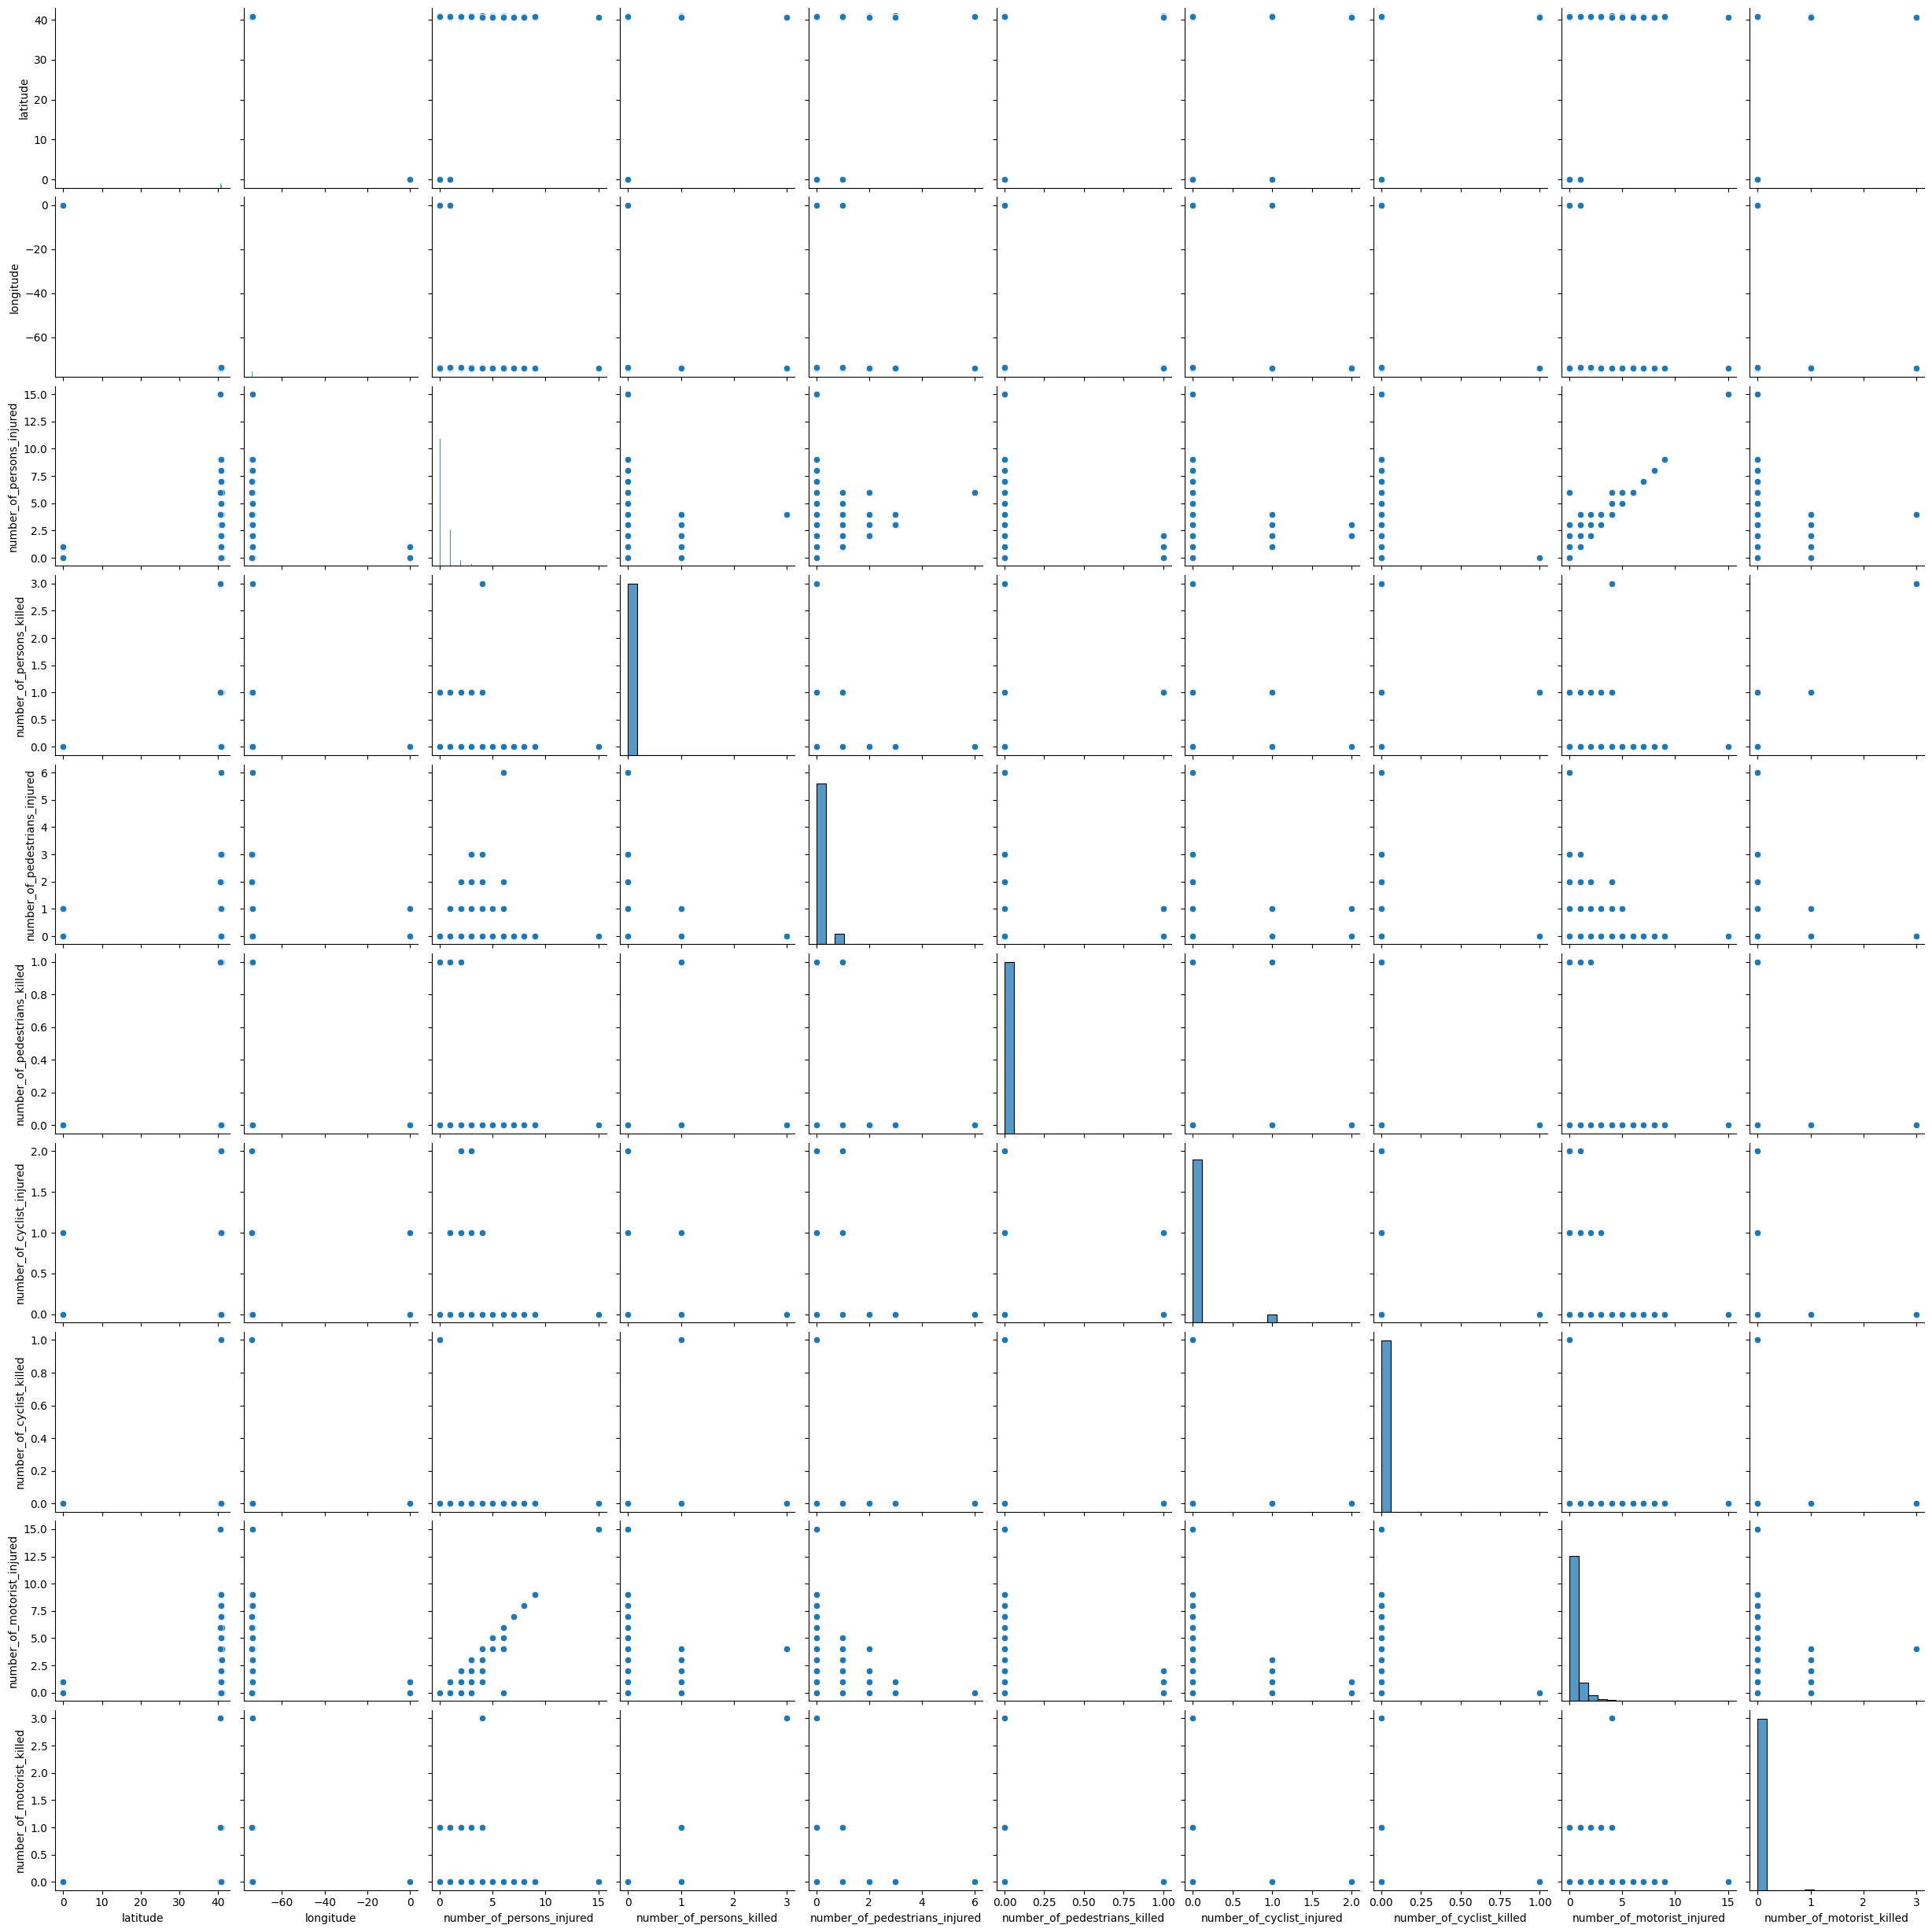

In [299]:
sns.pairplot(df)

<AxesSubplot: >

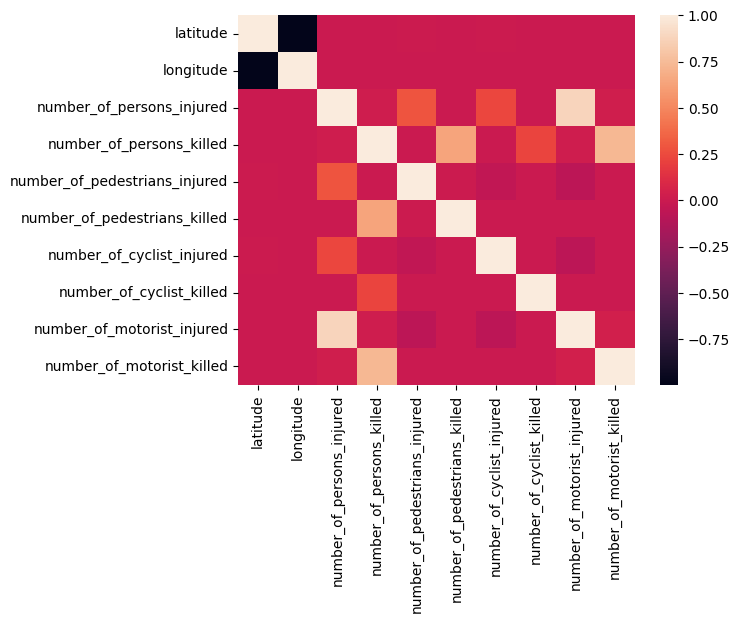

In [342]:
sns.heatmap(df.corr(numeric_only=True))

# Investigation of accidents over different time periods

In [332]:
df.timestamp.describe(datetime_is_numeric=True)

count                            49134
mean     2020-04-16 21:50:26.019049984
min                2020-01-01 00:00:00
25%                2020-02-09 19:23:00
50%                2020-03-22 00:48:00
75%                2020-06-28 16:06:00
max                2020-08-29 23:50:00
Name: timestamp, dtype: object

## Accidents by day, week

<AxesSubplot: >

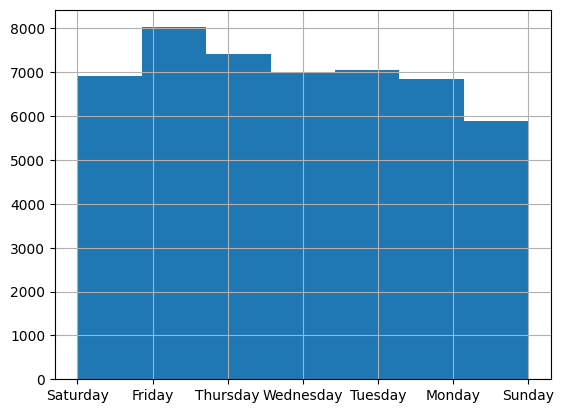

In [333]:
df.timestamp.dt.day_name().hist(bins=7)

## Subsection 2.1

<AxesSubplot: >

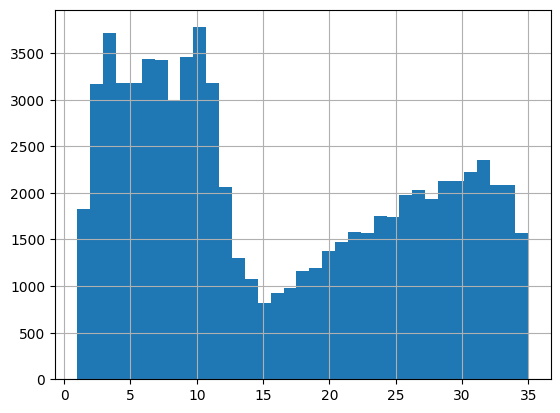

In [322]:
df.timestamp.dt.isocalendar().week.hist(bins=35)

# Investigation of accidents over different areas

## Accidents by borough

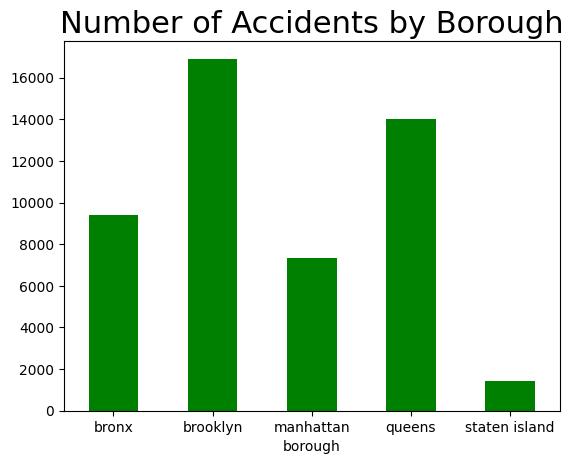

In [334]:
ax = df.groupby(['borough']).apply(len).plot.bar(color='green')
ax.set_title('Number of Accidents by Borough', fontsize=22)
ax.tick_params(axis='x', rotation=0)

I'm interested in some of this data per capita. This isn't a perfect normalization, as population doesn't reflect perfectly into how many people drive, walk, or cycle in each borough (i.e., Manhattan has a lower population than Queens and Brooklyn, but people commute in), but it gives a better view of how many accidents occur than the raw numbers.

I retrieved an estimate of New York's population by borough from [citypopulation.de](https://www.citypopulation.de/en/usa/newyorkcity/)

Text(0.5, 1.0, 'Accidents by Borough per Capita')

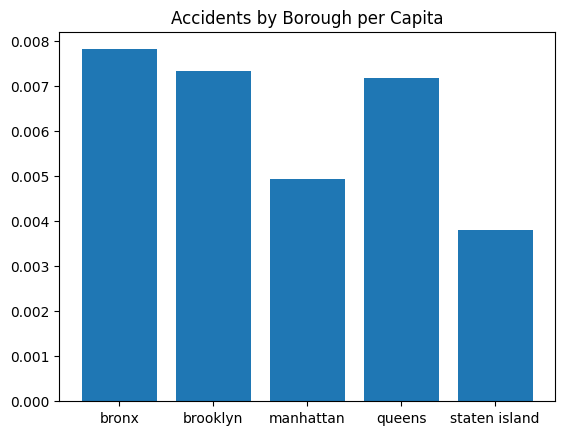

In [335]:
borough_population = {'bronx': 1203789, 'brooklyn': 2300664, 'manhattan': 1487536, 'queens': 1951598, 'staten island': 378977}
accidents_by_borough = df.groupby(['borough']).apply(len)
# print(accidents_by_borough)
accidents_by_borough_per_capita = [accidents_by_borough[bor] / borough_population[bor] for bor in borough_population.keys()]
# print(accidents_by_borough_normalized)
plt.bar(x=borough_population.keys(),height=accidents_by_borough_per_capita)
plt.title('Accidents by Borough per Capita')

<AxesSubplot: xlabel='weekday'>

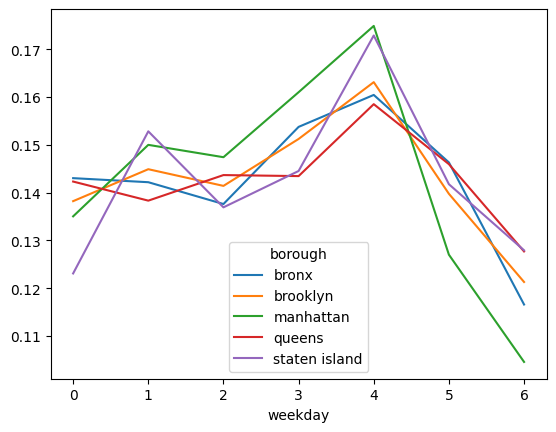

In [324]:
day = df.timestamp.dt.day_of_week
day.name = 'weekday'
weekday_by_borough = df.groupby(['borough', day]).apply(len).unstack(0)
weekday_by_borough_norm = weekday_by_borough/weekday_by_borough.sum()
weekday_by_borough_norm.plot()


In [336]:
df.groupby(['borough', day]).apply(len).unstack(1)

weekday,0,1,2,3,4,5,6
borough,,,,,,,
bronx,1347,1339,1296,1448,1511,1378,1098
brooklyn,2337,2450,2391,2557,2758,2363,2051
manhattan,993,1103,1084,1184,1286,934,769
queens,1993,1938,2014,2011,2221,2044,1790
staten island,178,221,198,209,250,205,185


## Accidents by zip

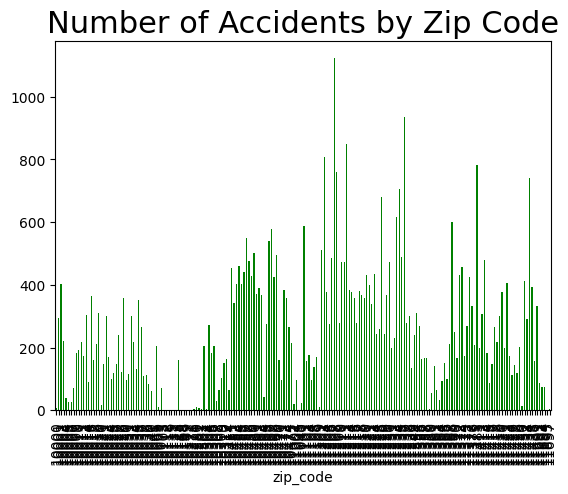

In [337]:
ax = df.groupby(['zip_code']).apply(len).plot.bar(color='green')
ax.set_title('Number of Accidents by Zip Code', fontsize=22)
ax.tick_params(axis='x', rotation=90)

## Total Injuries by Borough

In [338]:
df.groupby('borough')['number_of_persons_injured'].sum()

borough
bronx            3232
brooklyn         6024
manhattan        2151
queens           4595
staten island     610
Name: number_of_persons_injured, dtype: int64

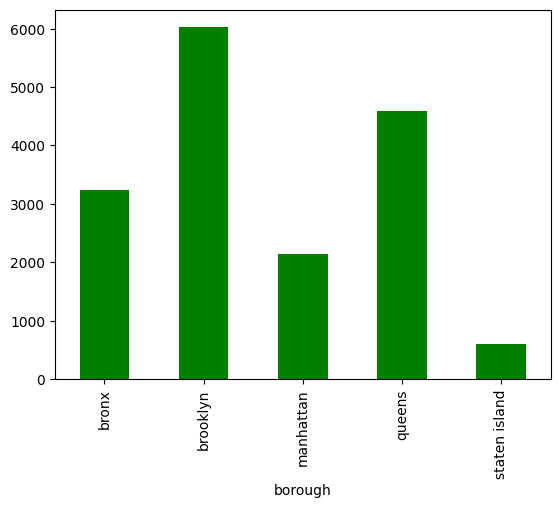

In [339]:
ax = df.groupby('borough')['number_of_persons_injured'].sum().plot.bar(color='green')


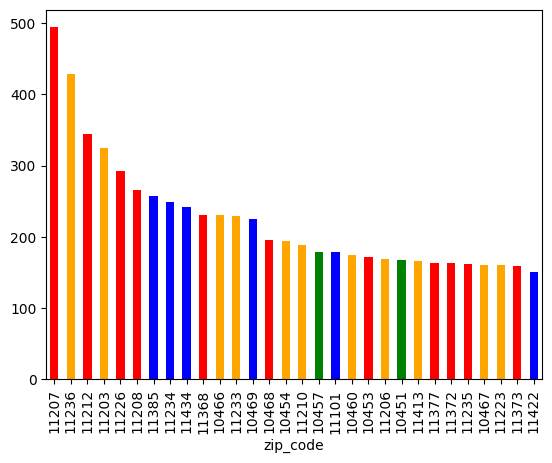

In [407]:
colors = {'bronx': 'red', 'brooklyn': 'orange', 'manhattan': 'green', 'queens': 'blue', 'staten island': 'purple'}
accidents_by_zip = df.groupby('zip_code')['number_of_persons_injured'].sum().sort_values(ascending=False).head(30).plot.bar(color=[colors[i] for i in df['borough']])


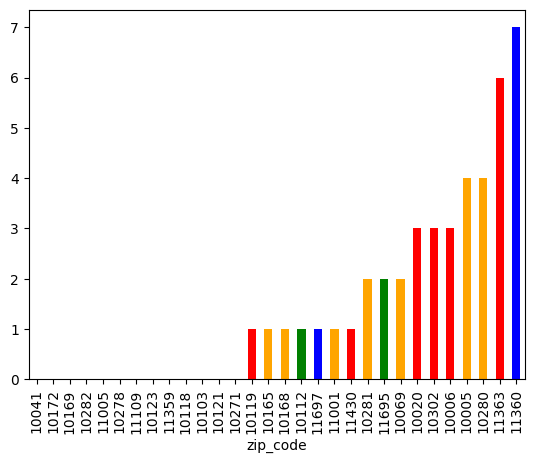

In [409]:
accidents_by_zip = df.groupby('zip_code')['number_of_persons_injured'].sum().sort_values(ascending=True).head(30).plot.bar(color=[colors[i] for i in df['borough']])

Here is an interesting chart. It shows the 40 streets with the most accidents. The color scheme is by borough.

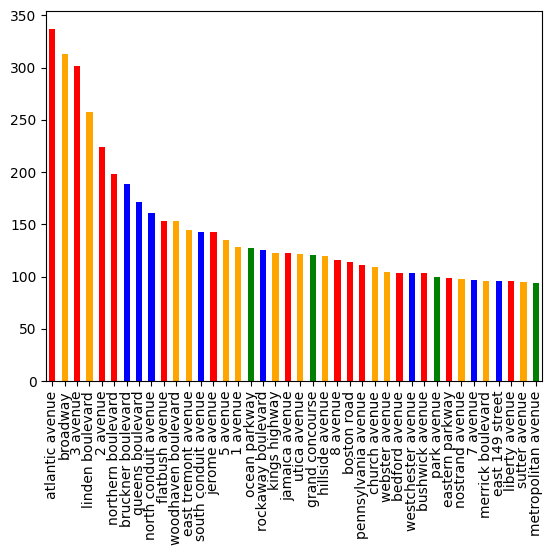

In [408]:
ax = df['on_street_name'].value_counts().head(40).plot(kind='bar', color=[colors[i] for i in df['borough']])

I looked briefly at the chart and realized there was a problem. I'm aware of 5th Ave in Manhattan, but in the chart it's color coded for Brooklyn. I checked out what was going on and found the following.

In [390]:
ave_5 = df[df['on_street_name'] == '5 avenue']
print(ave_5['borough'].value_counts())

manhattan    76
brooklyn     58
queens        1
Name: borough, dtype: int64


There is a 5th Ave in both Manhattan and Brooklyn (and the one in Brooklyn stretches up into Queens), and my chart is adding them together even through they are completely distinct streets. This would require a bit more work to sort them out, should I come revisit this later. 

Another issue is that some of these streets are VERY long. It would be interesting to normalize them by length, or by their number of intersections/cross streets to see if any of the shorter streets stand out here, or if the longer streets are the busiest, and therefore have the most accidents.

# Investigate data pre- and post-Covid

## Split data into pre- and post-Covid dataframes

At which date should I split the data?

A [quick search](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_City#Stay-at-home_order) shows that a stay-at-home order went into effect on March 22 (iso week 10). The accidents-by-week chart in section 2.1 above shows a sharp downward trend in traffic accidents beginning one or two weeks later and continuing until week 15, when they started to slowly climb. New York City reopened in four phases over 4 months beginning May 7. None of this is apparent in the nearly linear positive change in accidents after bottoming out.

I will split the data on March 22, even though there was a week or two delay in the number of accidents dropping off.

In [493]:
df_preC = df[df.timestamp < '2020-03-22 00:00:00'].reset_index(drop=True)
df_postC = df[df.timestamp >= '2020-03-22 00:00:00'].reset_index(drop=True)

<AxesSubplot: xlabel='borough'>

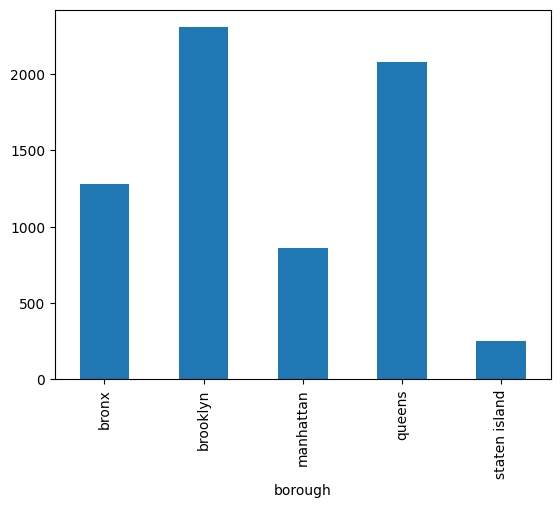

In [497]:
df_preC.groupby('borough')['number_of_persons_injured'].sum().plot(kind='bar')